In [1]:
from lab3 import read_file, classifier, write_file, create_figure, plot_line, plot_scatter
import numpy as np
import matplotlib.pyplot as plt

dataframe = read_file("unlabelled_data.csv")

In [2]:
from sklearn.linear_model import LinearRegression

# Extracting the features and target variable
X = dataframe[['x']]
y = dataframe['y']

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)

# Getting the coefficients of the regression line
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plotting the data points and the regression line
plt.scatter(dataframe['x'], dataframe['y'], color='blue', label='Data points')
plt.plot(dataframe['x'], model.predict(X), color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

ModuleNotFoundError: No module named 'sklearn'

Slope: 0.7841128060988802
Intercept: -0.009492097599269906


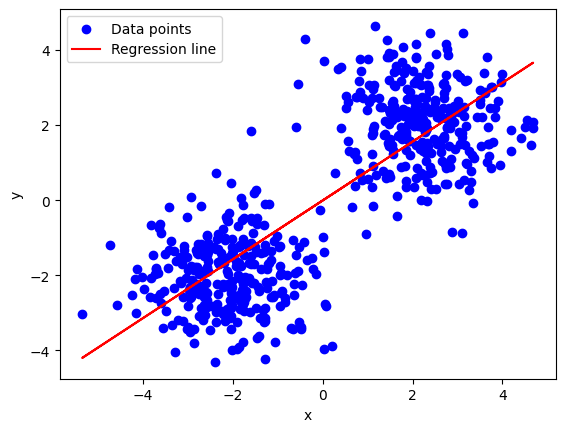

In [8]:
# Extracting the features and target variable
X = dataframe['x'].values
y = dataframe['y'].values

# Adding a column of ones to X to account for the intercept
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Calculating the optimal values for the parameters using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extracting the slope and intercept
intercept, slope = theta_best

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plotting the data points and the regression line
plt.scatter(dataframe['x'], dataframe['y'], color='blue', label='Data points')
plt.plot(dataframe['x'], intercept + slope * dataframe['x'], color='red', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Slope: -1.0728644050383722
Intercept: 0.06123419851563683


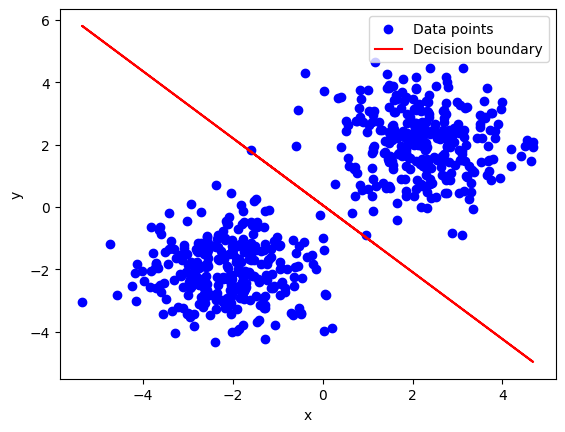

In [7]:
# Extracting the features and target variable
X = dataframe['x'].values
y = dataframe['y'].values

# Define the clusters based on the given information
negatives = dataframe[(dataframe['x'] < 0) & (dataframe['y'] < 0)]
positives = dataframe[(dataframe['x'] > 0) & (dataframe['y'] > 0)]

# Calculate the means of the clusters
mean_negatives = negatives.mean()
mean_positives = positives.mean()

# Calculate the within-class scatter matrix
S_w = np.cov(negatives.T) + np.cov(positives.T)

# Calculate the between-class scatter matrix
mean_diff = (mean_positives - mean_negatives).values.reshape(-1, 1)
S_b = mean_diff.dot(mean_diff.T)

# Calculate the linear discriminant
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w).dot(S_b))
linear_discriminant = eigvecs[:, np.argmax(eigvals)]

# Calculate the slope and intercept of the decision boundary
slope = -linear_discriminant[0] / linear_discriminant[1]
intercept = (mean_positives['y'] + mean_negatives['y']) / 2 - slope * (mean_positives['x'] + mean_negatives['x']) / 2

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

# Plotting the data points and the decision boundary
plt.scatter(dataframe['x'], dataframe['y'], color='blue', label='Data points')
plt.plot(dataframe['x'], slope * dataframe['x'] + intercept, color='red', label='Decision boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()